##### Deber Simpy - Parte 1
<h1><center>Entornos de soporte al desarrollo de simulaciones: Simpy - Parte 2</center></h1>
<h2><center> Universidad "Politecnica Salesiana" </center></h2>
<h5><right>Alumno: Juan Cañar. <br> Docente: Ing. Diego Quisi. </right></h5>

## Generacion de graficar de atencion. 

En base a la simulacion anterior generar una grafica de los autos atendidos.

In [15]:
import simpy
import random
import matplotlib.pyplot as pp

%matplotlib inline

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_LAVADO = 10 
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 3
# Tiempo de simulación
TIEMPO_SIMULACION = 27

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas, tiempo_lavado):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_lavado = tiempo_lavado
        
    def lavar_vehiculo(self, vehiculo):
        # Este metodo representa el proceso de lavado del vehículo.
        # Se ingresa el vehículo y se lava
        
        # Simulamos el tiempo que tarda en lavarse el vehiculo
        # Es importante notar que la instruccion "yield" es distinta de "sleep"
        # ya que esta ultima bloquea el hilo de ejecucion durante 't' unidades de tiempo,
        # mientras que 'yield' no bloquea el hilo de ejecucion, solo lo suspende mientras
        # el evento de 'lavado' se realice
        yield self.env.timeout(random.randint(TIEMPO_LAVADO-5, TIEMPO_LAVADO+5))
        
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        print('Removido  {%d%%} suciedad vehiculo => %s ' % (random.randint(30,90), vehiculo))
        
    
def llegada_vehiculo(env, nombre, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        yield maquina
        # Indicamos que vehiculo entra a la lavanderia
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))

       
        tiempo[nombre]=env.now
        
    
def ejecutar_simulacion(env, num_maquinas, tiempo_lavado, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_lavado)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(5):
        env.process(llegada_vehiculo(env, 'Vehiculo-%d'%(i+1),lavanderia))
    
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        env.process(llegada_vehiculo(env,'Vehiculo-%d'%(i+1),lavanderia))

print('Lavanderia UPS')

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO, INTERVALO_LLEGADA))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)


print("Diccionario timepo :")
print(tiempo)


Lavanderia UPS
Llega vehiculo: Vehiculo-1 a la hora 0.00.
Llega vehiculo: Vehiculo-2 a la hora 0.00.
Llega vehiculo: Vehiculo-3 a la hora 0.00.
Llega vehiculo: Vehiculo-4 a la hora 0.00.
Llega vehiculo: Vehiculo-5 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-1 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-2 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-3 a la hora 0.00.
Llega vehiculo: Vehiculo-6 a la hora 2.00.
Removido  {76%} suciedad vehiculo => Vehiculo-3 
Llega vehiculo: Vehiculo-7 a la hora 7.00.
Vehiculo [Vehiculo-3] lavado a las 7.00.
Entra vehiculo a lavarse: Vehiculo-4 a la hora 7.00.
Llega vehiculo: Vehiculo-8 a la hora 10.00.
Llega vehiculo: Vehiculo-9 a la hora 11.00.
Removido  {65%} suciedad vehiculo => Vehiculo-1 
Removido  {75%} suciedad vehiculo => Vehiculo-2 
Vehiculo [Vehiculo-1] lavado a las 12.00.
Vehiculo [Vehiculo-2] lavado a las 12.00.
Entra vehiculo a lavarse: Vehiculo-5 a la hora 12.00.
Entra vehiculo a lavarse: Vehiculo-6 a la hora 12.00.
Remo

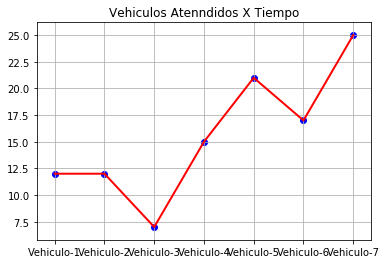

In [16]:
# Generamos la grafica
datos=sorted(tiempo.items()) # Ordenamos los datos
x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)
pp.plot(x,y,linewidth=2,color='red') #Dibujamos las lineas
pp.scatter(x,y,color='blue') # Dibujamos los puntos (x,y)
pp.title("Vehiculos Atenndidos X Tiempo")
pp.grid(True) #Generamos una cuadricula
pp.show() #Mostramos el grafico

## Paremetrizando la simulacion

* Considerar 3 tipos de vehículos con 3 diferentes tiempos de lavado:
    * Bus: 20 minutos
    * Automóvil: 7 minutos
    * Furgoneta: 12 minutos
* Considere que a partir de la entrada del vehículo para ser lavado, deberán tomarse en cuenta los siguientes tiempos correspondientes al proceso de traslado desde la recepción a la máquina de lavado:
    * Bus: 4 minutos
    * Automóvil: 1 minuto
    * Furgoneta: 2 minutos
* Realice una gráfica de la simulación con 3 máquinas de lavado

In [ ]:
import simpy
import random
import matplotlib.pyplot as pp

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57 
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en trasladarse un vehiculo (minutos)
TRASLADO_BUS = 4
TRASLADO_AUTOMOVIL= 1
TRASLADO_FURGONETA= 2
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_BUS = 20
TIEMPO_AUTOMOVIL= 7
TIEMPO_FURGONETA= 12
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 10
# Tiempo de simulación
TIEMPO_SIMULACION = 100

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas,tiempo_bus,tiempo_automovil,
                 tiempo_furgoneta,traslado_bus,traslado_automovil,traslado_furgoneta):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_bus = tiempo_bus
        self.tiempo_automovil = tiempo_automovil
        self.tiempo_furgoneta = tiempo_furgoneta
        self.traslado_bus = traslado_bus
        self.traslado_automovil = traslado_automovil
        self.traslado_furgoneta = traslado_furgoneta
        
    def lavar_vehiculo(self, vehiculo):
        automotor=vehiculo.split('-')
        if(automotor[0] == 'Bus'):
            yield self.env.timeout(TIEMPO_BUS)
        if(automotor[0] == 'Automovil'):
            yield self.env.timeout(TIEMPO_AUTOMOVIL)
        if(automotor[0] == 'Furgoneta'):
            yield self.env.timeout(TIEMPO_FURGONETA)
        #Solo agregamos al diccionario al momento que termina de lavar el vehiculo.
        k=automotor[0]
        if k in tiempo:
            tiempo[k]=tiempo[k]+1
        else:
            tiempo[k]=1
            
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        print('Removido  {%d%%} suciedad vehiculo => %s ' %(random.randint(30,90), vehiculo))
        
    def trasladar_vehiculo(self, vehiculo):
        automotor=vehiculo.split('-')
        if(automotor[0] == 'Bus'):
            yield self.env.timeout(TRASLADO_BUS)
        if(automotor[0] == 'Automovil'):
            yield self.env.timeout(TRASLADO_AUTOMOVIL)
        if(automotor[0] == 'Furgoneta'):
            yield self.env.timeout(TRASLADO_FURGONETA)
       
    
def llegada_vehiculo(env, nombre, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        yield maquina
        #Indicamos que el vehiculo se esta trasladando para ser lavado
        print('Se traslada vehiculo: %s a la hora %.2f.' % (nombre,env.now))
        #Procesamos el traslado del vehiculo
        yield env.process(lavanderia.trasladar_vehiculo(nombre))
        # Indicamos que vehiculo entra a la lavanderia
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))  
        
def ejecutar_simulacion(env, num_maquinas, tiempo_bus,tiempo_automovil,
                        tiempo_furgoneta,traslado_bus,traslado_automovil,
                        traslado_furgoneta, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_bus,tiempo_automovil,
                          tiempo_furgoneta,traslado_bus,traslado_automovil,
                          traslado_furgoneta)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(2):
        env.process(llegada_vehiculo(env, 'Bus-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'Automovil-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'Furgoneta-%d'%(i+1),lavanderia))
        
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        rnd = random.randint(1,100)
        if rnd <= 20: # Bus 20%, Furgoneta 30% y Automovil 50%
            env.process(llegada_vehiculo(env,'Bus-%d'%(i+1),lavanderia))
        elif rnd <= 50:
            env.process(llegada_vehiculo(env,'Furgoneta-%d'%(i+1),lavanderia))
        else:
            env.process(llegada_vehiculo(env,'Automovil-%d'%(i+1),lavanderia))

print('Lavanderia UPS')

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_BUS,TIEMPO_AUTOMOVIL,
                                TIEMPO_FURGONETA,TRASLADO_BUS,TRASLADO_AUTOMOVIL,
                                TRASLADO_FURGONETA, INTERVALO_LLEGADA))
# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

# Generamos la grafica
datos=sorted(tiempo.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='red')
pp.scatter(x,y,color='blue')
pp.grid(True)
pp.show()

## Práctica  Sympy 2
<h2><center> PAIS ALBANIA </center></h2>
En base a la simulacion, generar una simulacion lo mas apegado a la realidad del Covid-19, para ello obtener informacion del numero de consultorios y camas disponibles en un hospital del Pais de Albania. Parametrizar la simulacion para ingresar el numero de pacientes, el numero de consultorios y el numero de camas y algun otro parametro que considere oportuno.

Finalmente generar las siguientes metricas :
- Tiempo de espera promedio para cada sala.
- Tiempo promedio total que requiere un paciente para ser atendido desde cero.
- Cuántos pacientes se atendieron.
- Cuántos pacientes se quedaron sin atender y fallecieron.

https://github.com/CSSEGISandData/COVID-19

In [2]:
import simpy
import random
import matplotlib.pyplot as pp
import numpy as np
from time import sleep
from progress.bar import Bar
%matplotlib inline
from tqdm.notebook import trange, tqdm
from time import sleep

Inicio Simulacion Covid-19 Albania
ESCRIBA VALOR DE CRECIMIENTO: 2
Llega un paciente nuevo:  0 Madre Tereza denominado Hospital COVID 1
Llega un paciente nuevo:  1 Madre Tereza denominado Hospital COVID 1
Llega un paciente nuevo:  2 Madre Tereza denominado Hospital COVID 1
Llega un paciente nuevo:  3 Madre Tereza denominado Hospital COVID 1
Llega un paciente nuevo:  4 Madre Tereza denominado Hospital COVID 1
Llega un paciente nuevo:  5 Madre Tereza denominado Hospital COVID 1
Llega un paciente nuevo:  6 Madre Tereza denominado Hospital COVID 1
Llega un paciente nuevo:  7 Madre Tereza denominado Hospital COVID 1
Llega un paciente nuevo:  8 Madre Tereza denominado Hospital COVID 1
Llega un paciente nuevo:  9 Madre Tereza denominado Hospital COVID 1
Llega un paciente nuevo:  10 Madre Tereza denominado Hospital COVID 1
Llega un paciente nuevo:  11 Madre Tereza denominado Hospital COVID 1
Llega un paciente nuevo:  12 Madre Tereza denominado Hospital COVID 1
Llega un paciente nuevo:  13 Madr

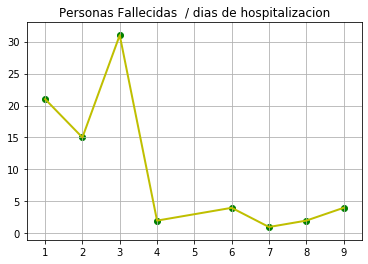

---------------------------------------------- :
------------RESULTADOS---------
Recuperados: 
40
Fallecidos: 
0


In [56]:
contagiados = 85
tiempoConsulta = 10  
internado = 10
simulacion = 10

#Diccionario para almacenar los resultados
recuperados={}
muertos={}
tConsultas=[]
TiempoEsperaConsultorio=[]
pacienteMuertosSinAntencionM=[]
pacientesAtendidos=[]

class SimulacionHospSTereza(object):
    #constructor
    def __init__(self, env, num_cama,num_consultorios, name):
            self.env = env
            self.num_cama = num_cama
            self.num_consultorios=num_consultorios
            self.camas = simpy.Resource(env, num_cama)
            self.consultorios=simpy.Resource(env, num_consultorios)
            self.name = name
    def ingresarConsultorio(self,paciente):
        consulta=random.uniform(tiempoConsulta-0.5, tiempoConsulta+0.5)
        yield self.env.timeout(consulta)
        print("El paciente ", paciente, " espero", int(consulta*1440), "minutos para se atendido")
        tConsultas.append(consulta)
        
    def PacienteCama(self, paciente):
        yield self.env.timeout(random.randint(internado-1.0, internado+1.0))
        print("El paciente ", paciente, " fue internado el día ", int(self.env.now))

def llegada_paciente(env, hospital, paciente):
    arrive = env.now
    with hospital.consultorios.request() as consultorio:
        esperandoConsulta=random.randint(1,3)
        TiempoEsperaConsultorio.append(esperandoConsulta)
        reque2 = yield consultorio | env.timeout(esperandoConsulta)
        espera2 = env.now - arrive
        if consultorio in reque2:
            print("Al paciente: ", paciente, "Se le ubica en una sala con cama.")
            yield env.process(hospital.ingresarConsultorio(paciente))
            estado = random.randint(1,100)
            pacientesAtendidos.append(1)
            if(estado < 40):
                with hospital.camas.request() as cama:
                    arrive2 = env.now
                    dias_esperando = random.randint(1,5) 
                    requerimiento = yield cama | env.timeout(dias_esperando) # tiempo de espera
                    espera = env.now - arrive2
                    if cama in requerimiento:
                        print("Al paciente: ", paciente, " se le asigna una cama")
                        yield env.process(hospital.PacienteCama(paciente))
                        estado = random.randint(1,100)
                        if (estado < 8) :
                            muertos[env.now] = muertos[env.now] + 1 if env.now in muertos else  1
                        else:
                            recuperados[env.now] = recuperados[env.now] + 1 if env.now in recuperados else 1
                    else:
                        print("El paciente " , paciente, " espero ", int(espera) , " dias y fallece por la falta de camas")
                        muertos[env.now] = muertos[env.now] + 1 if env.now in muertos else  1
            else :
                print("El paciente ", paciente, " no tiene COVID-19" )
        else:
            print("El paciente " , paciente, "espero ", int(espera2) ," dias y fallece porque no fue atendido")
            pacienteMuertosSinAntencionM.append(1)
            muertos[env.now] = muertos[env.now] + 1 if env.now in muertos else  1
def run(env, tasacrecimiento, infectados):
    numeroCamas= 42
    numeroConsultorios = 20
    hospSTereza = SimulacionHospSTereza(env, numeroCamas,numeroConsultorios, "Madre Tereza denominado Hospital COVID 1")
    for i in range(infectados):
        asignar_hospital(env, hospSTereza, i)
    paciente = infectados
    while True:
        yield env.timeout(1)
        for i in range(tasacrecimiento):
            paciente += 1
            asignar_hospital(env, hospSTereza, paciente)
                
def asignar_hospital(env, hospSTereza, paciente):
    hosp_esc = 1
    if (hosp_esc == 1):
        print("Llega un paciente nuevo: ", paciente, "Madre Tereza denominado Hospital COVID 1")
        env.process(llegada_paciente(env, hospSTereza, paciente))

    
print("Inicio Simulacion Covid-19 Albania")
entrada = int(input("ESCRIBA VALOR DE CRECIMIENTO: "))
env=simpy.Environment()
env.process(run(env,entrada, contagiados))
env.run(until=simulacion)
for i in trange(simulacion, desc='===>'):
    for j in tqdm(range(3), desc='==>'):
        sleep(0.001)

datos=sorted(muertos.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='y')
pp.scatter(x,y,color='g')
pp.title("Personas Fallecidas  / dias de hospitalizacion")
pp.grid(True)
pp.show()
print("---------------------------------------------- :")
print('------------RESULTADOS---------')
print("Recuperados: ")
print(round(sum(muertos)))
print("Fallecidos: ")
print(round(sum(recuperados)))

### METRICAS: 
----

--------------------------------------------------------------------------------------
Tiempo promedio en la sala de espera
==> 35  minutos
--------------------------------------------------------------------------------------
Tiempo promedio para que una persona sea atendida desde su llegada al hospital
==> 3  horas
--------------------------------------------------------------------------------------
Numero de pacientes atendidos
==> 9
--------------------------------------------------------------------------------------
Pacientes sin atencion medica y fallecieron
==> 86


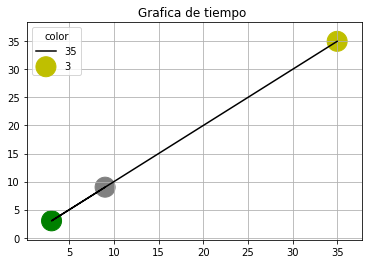

In [55]:
print("--------------------------------------------------------------------------------------")
print("Tiempo promedio en la sala de espera")
r= round(int(sum(tConsultas)/len(tConsultas)*3600)/1000)
print('==>',r, " minutos")
print("--------------------------------------------------------------------------------------")
print("Tiempo promedio para que una persona sea atendida desde su llegada al hospital")
s = (int(2*(sum(TiempoEsperaConsultorio)/len(TiempoEsperaConsultorio))))
print('==>',s," horas")
print("--------------------------------------------------------------------------------------")
print("Numero de pacientes atendidos")
t = sum(pacientesAtendidos)
print('==>',t)
print("--------------------------------------------------------------------------------------")
print("Pacientes sin atencion medica y fallecieron")
print('==>',sum(pacienteMuertosSinAntencionM))
x2=[r,s,t]
y=[r,s,t] 
pp.plot(x,y,linewidth=1.5,color='black')
pp.scatter(x2,y, color=['y','green','grey'],s=20**2)
pp.legend(x2,loc="upper left", title="color")
pp.title("Grafica de tiempo ")
pp.grid(True)
pp.show()

## Referencias
[1] Matloff, N. (2008). Introduction to Discrete-Event Simulation and the SimPy Language.

[2] Team Simpy (2017). SimPy Documentation, Release 3.0.10, 2017. URL: https://media.readthedocs.org/pdf/simpy/latest/simpy.pdf 